# Lightweight-Predictions
## Derived from generate clusters

In [1]:
# standard imports
import numpy as np
import os

# plotting tools
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm

# data management
import pandas as pd

# ipython reload capabilities for edits to external code
%load_ext autoreload
%autoreload 2


In [2]:
import matplotlib as mpl
mpl.rcParams['xtick.major.size'] = 0
mpl.rcParams['ytick.major.size'] = 0
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.left'] = True
mpl.rcParams['font.weight'] = 'medium'
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10

from matplotlib import font_manager as fm, rcParams
import matplotlib.pyplot as plt

fpath = os.path.join(rcParams["datapath"], '/Users/mpetersen/Downloads/Roboto_Condensed/RobotoCondensed-Regular.ttf')
prop = fm.FontProperties(fname=fpath)
fname = os.path.split(fpath)[1]

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = prop.get_name()
plt.rcParams['font.weight'] = 'medium'








## Part 1: Hitters

In [3]:
import hittingpredictor as hp

In [4]:

# which years are we interested in querying?
years = range(2019-10, 2019+1)


year_dfs = []

for year in years:
    print(year)

    df = hp.scrape_year(year=year,cat='bat',verbose=0)
    year_dfs.append(df)

# concatenate results from all years
all_year_data_hitting = year_dfs[0]
for year in year_dfs[1:]:
    all_year_data_hitting = pd.concat([all_year_data_hitting, year])
    



2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019


In [5]:
nclusters = 12

year_df,df,stereotype_df,hitter_cluster_centroid_df,transform = hp.compute_cluster(all_year_data_hitting,years,nclusters,min_pas=150,verbose=0)


In [6]:
chkstat = 'HR'
plr = 'Christian Yelich'
#plr = 'Matt Chapman'
#plr = 'Jose Altuve'



lght_df = df.loc[df['Name'] == plr]


uni_years,indi_values,unc_values,pred_vals,pred_errs = \
hp.make_manual_predictions_batting(lght_df,hitter_cluster_centroid_df,chkstat)

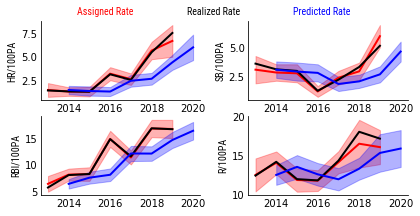

In [7]:
fig = plt.figure(figsize=(6,3))

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)
axlist = [ax1,ax2,ax3,ax4]
statlist = ['HR','SB','RBI','R']

for ichk,chkstat in enumerate(statlist):

    uni_years,indi_values,unc_values,pred_vals,pred_errs = \
hp.make_manual_predictions_batting(lght_df,hitter_cluster_centroid_df,chkstat)
    
    
    axlist[ichk].fill_between(uni_years,indi_values-np.abs(unc_values),indi_values+np.abs(unc_values),color='red',alpha=0.3)
    axlist[ichk].plot(uni_years,indi_values,color='red')
    axlist[ichk].plot(uni_years,lght_df[chkstat+'.Normalize'],color='black')

#ex_years_vals = [1.93,2.36,3.50,5.08]
    axlist[ichk].fill_between(uni_years+1,pred_vals-np.abs(pred_errs),pred_vals+np.abs(pred_errs),color='blue',alpha=0.3)
    axlist[ichk].plot(uni_years+1,pred_vals,color='blue')
    axlist[ichk].set_ylabel(chkstat+'/100PA', fontproperties=prop)


plt.subplots_adjust(wspace=0.3,hspace=0.2,top=0.93,left=0.1,right=0.95)


plt.text(  # position text relative to Figure
    0.25, 0.95,'Assigned Rate',color='red',ha='center', va='bottom',
    transform=fig.transFigure,fontproperties=prop)
plt.text(  # position text relative to Figure
    0.5, 0.95,'Realized Rate',color='black',ha='center', va='bottom',
    transform=fig.transFigure,fontproperties=prop)

plt.text(  # position text relative to Figure
    0.75, 0.95,'Predicted Rate',color='blue',ha='center', va='bottom',
    transform=fig.transFigure,fontproperties=prop)



#fig.tight_layout()
plt.savefig('figures/{}_predictions.png'.format(plr.split()[1]),dpi=500)

## Part 2: Pitchers

In [8]:
import pitchingpredictor as pp

In [9]:

# which years are we interested in querying?
years = range(2019-10, 2019+1)



year_dfs = []

for year in years:
    print(year)

    df = pp.scrape_year(year=year,cat='pit',verbose=0)
    year_dfs.append(df)

# concatenate results from all years
all_year_data_pitching = year_dfs[0]
for year in year_dfs[1:]:
    all_year_data_pitching = pd.concat([all_year_data_pitching, year])
    




2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019


In [10]:
nclusters = 11


year_df,df,stereotype_df,cluster_centroid_df,transform = pp.compute_cluster_pitching(all_year_data_pitching,years,nclusters,min_ip=10,verbose=0)





In [11]:
chkstat = 'ER'
plr = 'Dallas Keuchel'
plr = 'Mike Clevinger'



lght_df = df.loc[df['Name'] == plr]


uni_years,indi_values,unc_values,pred_vals,pred_errs = \
pp.make_manual_predictions_pitching(lght_df,cluster_centroid_df,chkstat,nclusters=nclusters)

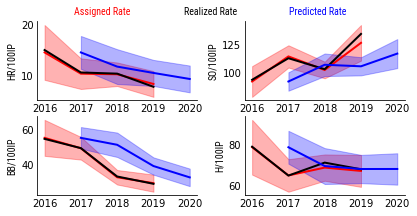

In [12]:
fig = plt.figure(figsize=(6,3))

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)
axlist = [ax1,ax2,ax3,ax4]
statlist = ['HR','SO','BB','H']

for ichk,chkstat in enumerate(statlist):

    uni_years,indi_values,unc_values,pred_vals,pred_errs = \
pp.make_manual_predictions_pitching(lght_df,cluster_centroid_df,chkstat,nclusters=nclusters)
    
    
    axlist[ichk].fill_between(uni_years,indi_values-np.abs(unc_values),indi_values+np.abs(unc_values),color='red',alpha=0.3)
    axlist[ichk].plot(uni_years,indi_values,color='red')
    axlist[ichk].plot(uni_years,np.abs(lght_df[chkstat+'.Normalize']),color='black')

#ex_years_vals = [1.93,2.36,3.50,5.08]
    axlist[ichk].fill_between(uni_years+1,pred_vals-np.abs(pred_errs),pred_vals+np.abs(pred_errs),color='blue',alpha=0.3)
    axlist[ichk].plot(uni_years+1,pred_vals,color='blue')
    axlist[ichk].set_ylabel(chkstat+'/100IP', fontproperties=prop)


plt.subplots_adjust(wspace=0.3,hspace=0.2,top=0.93,left=0.1,right=0.95)


plt.text(  # position text relative to Figure
    0.25, 0.95,'Assigned Rate',color='red',ha='center', va='bottom',
    transform=fig.transFigure,fontproperties=prop)
plt.text(  # position text relative to Figure
    0.5, 0.95,'Realized Rate',color='black',ha='center', va='bottom',
    transform=fig.transFigure,fontproperties=prop)

plt.text(  # position text relative to Figure
    0.75, 0.95,'Predicted Rate',color='blue',ha='center', va='bottom',
    transform=fig.transFigure,fontproperties=prop)



#fig.tight_layout()
plt.savefig('figures/{}_predictions.png'.format(plr.split()[1]),dpi=500)

